In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Read the data
df = pd.read_csv('IT_Jobs.csv')

In [31]:
df.job_salary.value_counts()

3 to 5 years         159
More than 3 years    125
1 to 3 years         115
More than 5 years    114
2 to 4 years          91
                    ... 
3 to 20 years          1
4 to 15 years          1
1 to 6 years           1
7 to 11 years          1
5 to 20 years          1
Name: job_salary, Length: 83, dtype: int64

In [32]:
print(df.job_description[0])

We are building a product development team and are looking for a Senior Fullstack (Laravel / React) Developer. You should be willing to take responsibility for a project and be in charge of both the architecture and implementation of the frontend and backend.Through Remotecoders, you will be working in Cairo, taking care of two interns and you will be working directly with our team of experts, designers, and project managers to help bring this product to life.We are one of the leading digital consultancies with a headquarter in Zurich, Switzerland. With our global team, we build digital products, create outstanding websites, and help our clients to grow. Our clients range from leading startups to global Enterprises. We now also want to build our own products and this is why we are looking for you.


In [33]:
df.head()

,job_id,job_title,job_url,job_company,job_location,job_salary,job_description,job_skills
0,1,Laravel / React Fullstack Developer,https://wuzzuf.net/jobs/p/ANjcrMykms7n-Laravel...,Remotecoders,"Remotecoders - Cairo, Egypt",3 to 15 years,We are building a product development team and...,laravel*react*information technology (it)*soft...
1,2,Senior Flutter Developer,https://wuzzuf.net/jobs/p/bOpj4upoaFzo-Senior-...,Not Specified,"Confidential Company - Maadi, Cairo",More than 3 years,We are looking for an experienced Flutter Deve...,information technology (it)*software developme...
2,3,Network Engineer,https://wuzzuf.net/jobs/p/mopC913yZmCu-Network...,SABA,"SABA - Heliopolis, Cairo",2 to 5 years,\nWe are looking for a Network Engineer to des...,network engineer*design*network administrator*...
3,4,IT Help Desk Admin,https://wuzzuf.net/jobs/p/Ol4FPHeZV9xN-IT-Help...,Sykes Enterprises,"Sykes Enterprises - Maadi, Cairo",1 to 3 years,Provides desktop and End User Support to ensur...,dns*computer science*networks*information tech...
4,5,Product Designer - UI/UX (FinTech),https://wuzzuf.net/jobs/p/zlENZQBI7fDs-Product...,Bright Creations,"Bright Creations - Smart Village, Giza",More than 3 years,Our FounderDAZU Pay is a new FinTech startup f...,adobe xd*design*ui*ux design*product design*ui...


In [34]:
# Drop the columns that are not needed
df.drop(['job_id','job_salary','job_url','job_company','job_description'], axis=1, inplace=True)


df.head()

,job_title,job_location,job_skills
0,Laravel / React Fullstack Developer,"Remotecoders - Cairo, Egypt",laravel*react*information technology (it)*soft...
1,Senior Flutter Developer,"Confidential Company - Maadi, Cairo",information technology (it)*software developme...
2,Network Engineer,"SABA - Heliopolis, Cairo",network engineer*design*network administrator*...
3,IT Help Desk Admin,"Sykes Enterprises - Maadi, Cairo",dns*computer science*networks*information tech...
4,Product Designer - UI/UX (FinTech),"Bright Creations - Smart Village, Giza",adobe xd*design*ui*ux design*product design*ui...


In [35]:
def seperateSkills(skill):
    skills = skill.split('*')
    arr = [sk.strip().lower() for sk in skills]
    for sk in arr:
        if sk in ['', 'information technology (it)', 'computer science', 'software development', 'engineering', 'software engineering', 'software' ]:
            arr.remove(sk)
    return arr

df['cleaned_skills'] = df['job_skills'].apply(seperateSkills)


In [36]:
print(df['job_skills'][3])
print(df.cleaned_skills[3])

dns*computer science*networks*information technology (it)*lan*wan*cisco routing*routing*active directory*help desk*microsoft office*proxy*vmware*
['dns', 'networks', 'lan', 'wan', 'cisco routing', 'routing', 'active directory', 'help desk', 'microsoft office', 'proxy', 'vmware']


In [37]:
# import tfidf vectorizer
vocab = []
titles = []
for skills in df.cleaned_skills:
    if len(skills) > 1:
        vocab.extend(skills)
    
for title in df.job_title:
    titles.append(title)
# extract last word from column job_location
df['job_location_city'] = df['job_location'].str.split().str[-1]

vocabDf = pd.DataFrame(vocab, columns=['skills'])
titlesDf = pd.DataFrame(titles, columns=['titles'])
print(vocabDf.head(10))
titlesDf.head(10)

                 skills
0               laravel
1                 react
2  software development
3                  rest
4                   vue
5                   css
6                   git
7                 html5
8     twitter-bootstrap
9                  scss


,titles
0,Laravel / React Fullstack Developer
1,Senior Flutter Developer
2,Network Engineer
3,IT Help Desk Admin
4,Product Designer - UI/UX (FinTech)
5,Project Manager
6,Oracle Application Support
7,SME's Sales Account Manager
8,Frontend Developer - React/Vue (FinTech)
9,Senior Backend Engineer - Java (FinTech)


In [38]:
print(vocabDf.skills.value_counts().index)
print(titlesDf.titles.value_counts().index)

Index(['javascript', 'information technology (it)', 'english', 'sql',
       'computer engineering', '', 'computer science', 'agile', 'design',
       'html',
       ...
       'nursing', 'health information system', 'health informatics',
       'informatics', 'health', 'systems analyst', 'express',
       'communications engineering', 'routers', 'iqbot'],
      dtype='object', length=1675)
Index(['Full Stack Developer', 'Senior Front End Developer', 'Scrum Master',
       'Senior Java Developer', 'UI UX Designer', 'Senior PHP Developer',
       'Senior iOS Developer', 'Business Analyst', 'Front End Developer',
       'IT Help Desk',
       ...
       'Senior Quality Control Engineer - Gaming Application',
       'System Test Engineer', 'Tech Lead Full Stack Software Engineer',
       'Senior Full-Stack Software Engineer', 'Security Application Engineer',
       'Junior Angular Front-End Developer',
       'Senior Business Intelligence Specialist',
       'Senior Full Stack Developer (

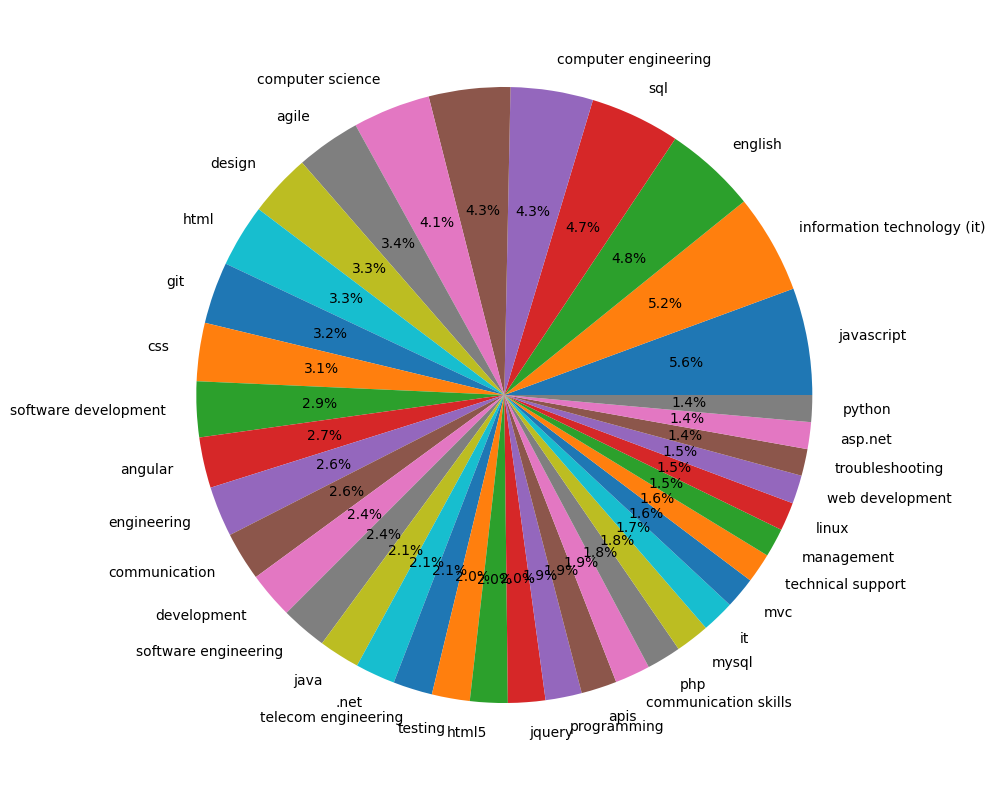

In [39]:
#count plot of skills
plt.figure(figsize=(10,10))
val_cnt = vocabDf.skills.value_counts()
val_cnt = val_cnt[val_cnt.index != 'information technology (it)']
val_cnt = val_cnt[val_cnt.index != 'computer science']
val_cnt = val_cnt[val_cnt.index != 'software development']
val_cnt = val_cnt[val_cnt.index != 'engineering']
val_cnt = val_cnt[val_cnt.index != 'software engineering']
val_cnt = val_cnt[val_cnt.index != 'software']
plt.pie(val_cnt[val_cnt > 80], labels=val_cnt[val_cnt > 80].index, autopct='%1.1f%%')
plt.show()
# sns.countplot(y='skills', data=vocabDf, order=vocabDf['skills'].value_counts().iloc[:20].index)


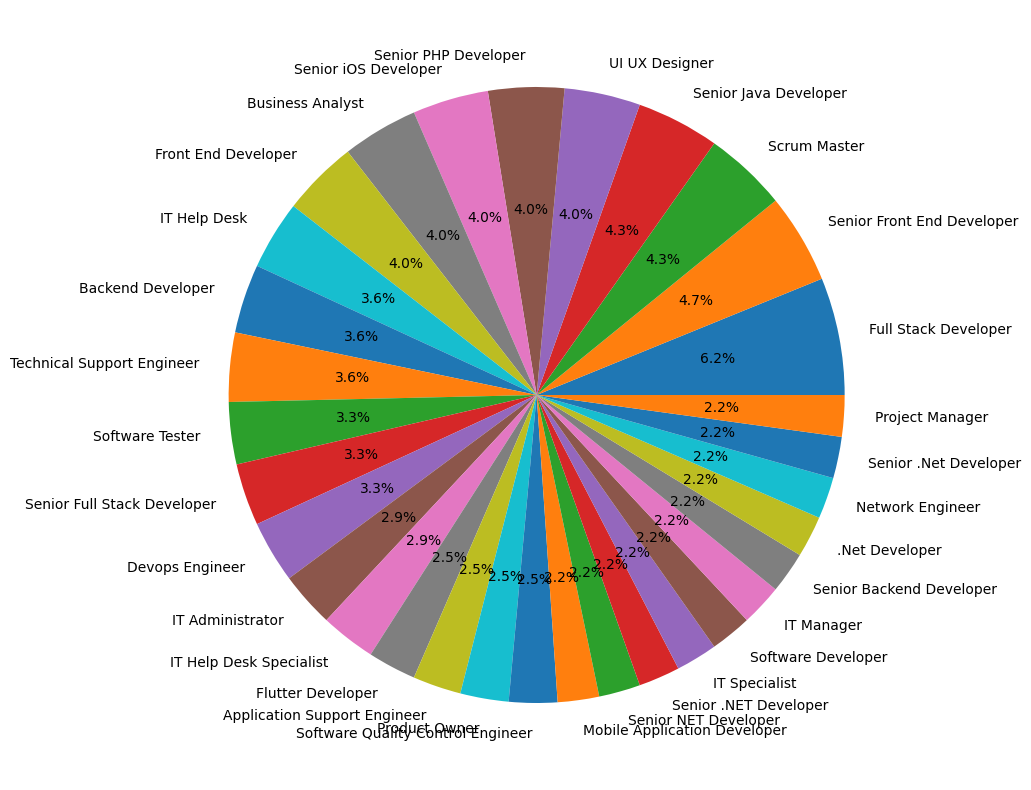

In [40]:
plt.figure(figsize=(10,10))
title_cnt = titlesDf.titles.value_counts()
title_cnt = title_cnt[title_cnt > 5]
plt.pie(title_cnt, labels=title_cnt.index, autopct='%1.1f%%')
plt.show()

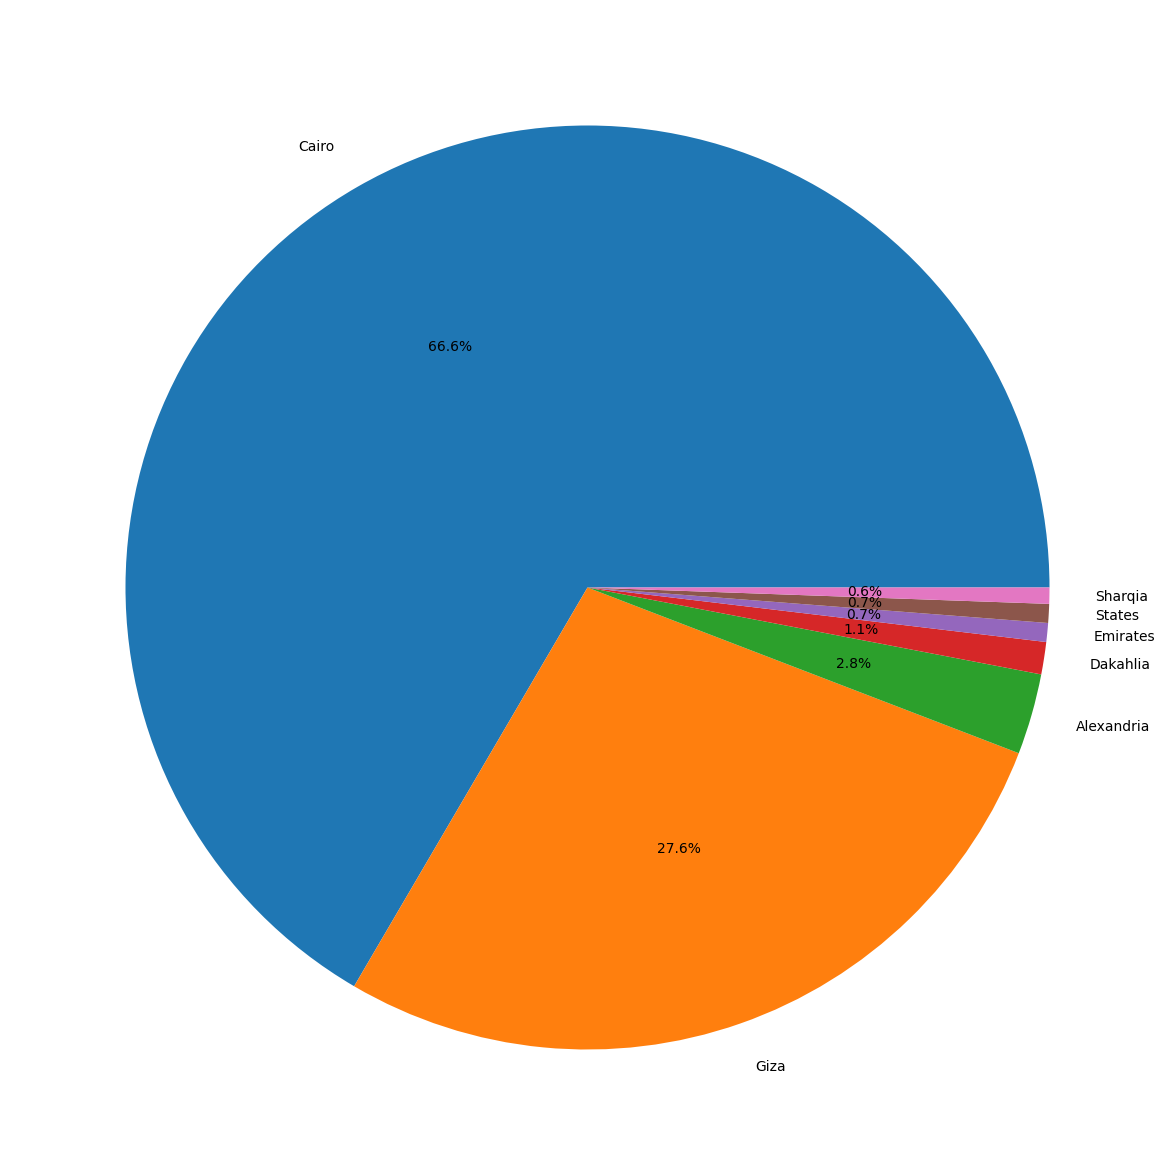

In [41]:
plt.figure(figsize=(15,15))
loc_cnt = df.job_location_city.value_counts()
loc_cnt = loc_cnt[loc_cnt.index != 'Egypt']
loc_cnt = loc_cnt[loc_cnt.index != 'Arabia']
loc_cnt = loc_cnt[loc_cnt > 5]

plt.pie(loc_cnt, labels=loc_cnt.index, autopct='%1.1f%%')
plt.show()

In [42]:
# # import tfidf vectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()

# # fit the vectorizer on the skills
# tfidf_matrix = tfidf.fit_transform(df['cleaned_skills'].apply(lambda x: ' '.join(x)))

# # convert the matrix to an array
# tfidf_array = tfidf_matrix.toarray()

# # convert the array to a dataframe
# tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names())
# print(tfidf_df.shape)

In [43]:
df.drop(['job_location','job_skills'], axis=1, inplace=True)

df.head()

,job_title,cleaned_skills,job_location_city
0,Laravel / React Fullstack Developer,"[laravel, react, software development, rest, v...",Egypt
1,Senior Flutter Developer,"[software development, android design, android...",Cairo
2,Network Engineer,"[network engineer, design, network administrat...",Cairo
3,IT Help Desk Admin,"[dns, networks, lan, wan, cisco routing, routi...",Cairo
4,Product Designer - UI/UX (FinTech),"[adobe xd, design, ui, ux design, product desi...",Giza


In [44]:
df['cleaned_skills_joined'] = df.cleaned_skills.apply(lambda x: ' '.join(x))

df.head()

,job_title,cleaned_skills,job_location_city,cleaned_skills_joined
0,Laravel / React Fullstack Developer,"[laravel, react, software development, rest, v...",Egypt,laravel react software development rest vue cs...
1,Senior Flutter Developer,"[software development, android design, android...",Cairo,software development android design android gi...
2,Network Engineer,"[network engineer, design, network administrat...",Cairo,network engineer design network administrator ...
3,IT Help Desk Admin,"[dns, networks, lan, wan, cisco routing, routi...",Cairo,dns networks lan wan cisco routing routing act...
4,Product Designer - UI/UX (FinTech),"[adobe xd, design, ui, ux design, product desi...",Giza,adobe xd design ui ux design product design ui...


In [45]:
# import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( ngram_range=(1,3))

df['cleaned_skills_joined'] = df.cleaned_skills_joined.fillna(" ")

# fit the vectorizer on the skills
tfidf_matrix = tfidf.fit_transform(df['cleaned_skills_joined'])


In [33]:
# import linear kernel
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [34]:
indices = pd.Series(df.index, index=df['job_title']).drop_duplicates()
indices

job_title
Laravel / React Fullstack Developer       0
Senior Flutter Developer                  1
Network Engineer                          2
IT Help Desk Admin                        3
Product Designer - UI/UX (FinTech)        4
                                       ... 
Senior QC Automation Tester            1459
AI Business Development Internship     1460
Robotics (RPA) Developer               1461
Corporate Sales Account Manager        1462
C++ Developer - Internal Tools         1463
Length: 1464, dtype: int64

In [35]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the job that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all jobs with that job
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the jobs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar jobs
    sim_scores = sim_scores[1:11]

    # Get the job indices
    job_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar jobs
    return df['job_title'].iloc[job_indices]

get_recommendations('Data Scientist')

1111                 Machine Learning Engineer
187           Senior Machine Learning Engineer
457           Senior Machine Learning Engineer
576              Python Developer - Internship
1155               SQL Data Platform Team lead
1065                     Senior Data Architect
1212             ETL Developer (Data Engineer)
712           Data Analyst (Tableau Developer)
795                                    BI Lead
1236    Senior Software Business Analyst / ERP
Name: job_title, dtype: object

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')


In [ ]:
encoder(['asdsa asd '])

In [43]:
def embed(text):
  return encoder(text)

In [44]:
embeddings = embed(df['cleaned_skills_joined'])
embeddings.shape

TensorShape([1464, 512])

In [45]:
model = NearestNeighbors(n_neighbors=10)
model.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [46]:
def recommend(text):
  emb = embed([text])
  neighbors = model.kneighbors(emb, return_distance=False)[0]
  return df['job_title'].iloc[neighbors].tolist()

recommend('javascript')

['Dotnet Developer',
 'IT Analyst - GOCOZMO Subsidiary of Airarabia',
 'Full stack Web Developer (UX/UI)',
 'Full stack Web Developer (UX/UI)',
 'Software Developer',
 'Odoo Developer',
 '.NET Developer',
 'Senior PHP Developer',
 'Senior PHP Developer',
 'Senior .Net Developer']

In [47]:
recommend('javascript full stack')

['Full stack Web Developer (UX/UI)',
 'Full stack Web Developer (UX/UI)',
 'Java Full Stack/AWS Lead - Cairo',
 'Full Stack Developer',
 'Full Stack Developer - Alexandria',
 'Full Stack Developer - Alexandria',
 'Junior Full Stack .Net Developer',
 'Full Stack Developer',
 'Senior Backend NodeJS Developer',
 'Senior Backend NodeJS Developer']

In [49]:
recommend('sql excel powerbi python')

['Software devloper',
 'Senior Database Administrator',
 'Odoo Developer',
 'Odoo Developer',
 'Senior SQL Developer',
 'Senior Python Backend Engineer Core DB',
 'Data Science Supervisor',
 'AWS Developer',
 'Senior Python Backend Engineer- Core API.',
 'Full Stack Developer']

In [51]:
recommend('c++ javascript react angular frontend ui design')

['Frontend Developer - React/Vue (FinTech)',
 'Frontend Developer - React/Vue (FinTech)',
 'Frontend Developer - React/Vue (FinTech)',
 'Frontend Developer',
 'Frontend Developer',
 'Senior React JS Developer',
 'Senior React JS Developer',
 'Senior Front End Developer',
 'Senior Front End Developer',
 'Front-End (Angular) Developer']